In [202]:
from sklearn import mixture
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from six.moves import xrange
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import os
import sys
!{sys.executable} -m pip install opencv-python
import cv2
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## A

In [203]:
data = pd.read_csv("Skin-NonSkin.csv",delimiter='\t')
data_Y = data['1']
data_X = data.drop(columns='1')

In [223]:
# Try GMMs using different types of covariances.
models = dict((covar_type, mixture.GaussianMixture(n_components=5,max_iter=100000,random_state=20,
                    covariance_type=covar_type, init_params='kmeans'))
                   for covar_type in ['diag', 'full'])

n_models = len(models)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=55)
data_skin = data[data['1']==1]
data_skin = data_skin.drop(columns='1')
data_skin

,74,85,123
0,73,84,122
1,72,83,121
2,70,81,119
3,70,81,119
4,69,80,118
...,...,...,...
50853,97,134,184
50854,94,134,183
50855,95,132,182
50856,92,132,181


In [206]:
for index, (name, classifier) in enumerate(models.items()):
#     classifier.means_ = np.array([data_X[data_Y == i].mean(axis=0) for i in xrange(2)])
    classifier.fit(data_X)
    y_train_pred = classifier.predict(data_X)
    y_test_pred = classifier.predict(data_skin)
    u,c = np.unique(y_test_pred, return_counts = True)
    y = u[c == c.max()]
    print(f'for {name}, most freq label is {u[c == c.max()]} with freq {c.max()}')
#train  best obtained gmm  
gmm = mixture.GaussianMixture(max_iter=100000, n_components=5, random_state=20)
gmm.fit(data_X)

for spherical, most freq label is [3] with freq 28448
for diag, most freq label is [3] with freq 31974
for tied, most freq label is [3] with freq 34119
for full, most freq label is [3] with freq 37681


GaussianMixture(max_iter=100000, n_components=5, random_state=20)

In [207]:
def img_ploter(img,x,y):
    plt.axis("off")
    plt.imshow(np.array(new_img).reshape(x,y,3))
    plt.show()

## B

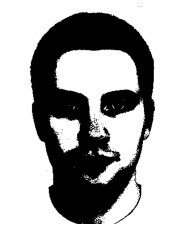

[[20382 57191]
 [26069 24358]]
accuracy:
0.34953125


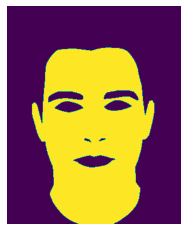

In [212]:
ima = cv2.imread('m(01-32)_gr.jpg')
g = cv2.imread('m(01-32)_gr.png')
x,z,_ = np.shape(ima)
size = x*z
# print(np.ravel(ima).reshape(size, -1))
np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)))
u,c = np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)), return_counts = True)
y = u[c == c.max()]
# print(f'for {name}, most freq label is {u[c == c.max()]} with freq {c.max()}')
new_img = [None] * size
predicts = []
predicts = gmm.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicts)):
    if predicts[i] == y:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
for i in range(len(predicts)):
    if predicts[i] == y:
        ni[i] = 255
    else:
        ni[i] = 0
gh =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gh+=[int(g[i][j][1])]
img_ploter(new_img,x,z)
print(confusion_matrix(gh, ni))
print('accuracy:')
print(accuracy_score(gh, ni))
img_ploter(np.array(new_img),x,z)       
ni = [None] * size

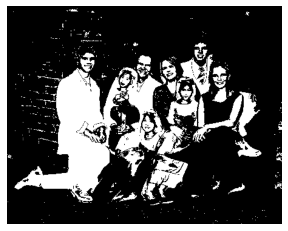

[[ 30027 120501]
 [  6303   5796]]
accuracy:
0.2202770757623273


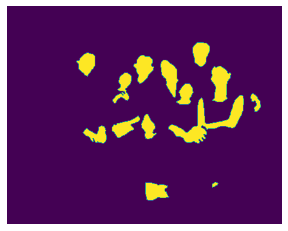

In [213]:
ima = cv2.imread('large_Chapman-family.jpg')
g = cv2.imread('large_Chapman-family.png')
x,z,_ = np.shape(ima)
size = x*z
# print(np.ravel(ima).reshape(size, -1))
np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)))
u,c = np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)), return_counts = True)
y = u[c == c.max()]
# print(f'for {name}, most freq label is {u[c == c.max()]} with freq {c.max()}')
new_img = [None] * size
predicts = []
predicts = gmm.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicts)):
    if predicts[i] != y:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       

nk = [None] * size
for i in range(len(predicts)):
    if predicts[i] == y:
        nk[i] = 255
    else:
        nk[i] = 0
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
# print(np.shape(gk))
# print(np.shape(nk))
print(confusion_matrix(gk, nk))
print('accuracy:')
print(accuracy_score(gk, nk))
img_ploter(np.array(new_img),x,z)       


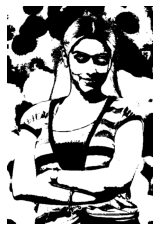

[[151657 146802]
 [ 80905  23636]]
accuracy is:
0.434970223325062


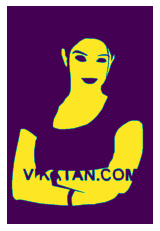

In [214]:
ima = cv2.imread('920480_f520.jpg')
g = cv2.imread('920480_f520.png')
x,z,_ = np.shape(ima)
size = x*z
# print(np.ravel(ima).reshape(size, -1))
np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)))
u,c = np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)), return_counts = True)
y = u[c == c.max()]
# print(f'for {name}, most freq label is {u[c == c.max()]} with freq {c.max()}')
new_img = [None] * size
predicts = []
predicts = gmm.predict(np.ravel(ima).reshape(size, -1))
nk = [None] * size
for i in range(len(predicts)):
    if predicts[i] != y:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
for i in range(len(predicts)):
    if predicts[i] == y:
        nk[i] = 255
    else:
        nk[i] = 0
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
print(confusion_matrix(gk, nk))
print('accuracy is:')
print(accuracy_score(gk, nk))
img_ploter(np.array(new_img),x,z)       


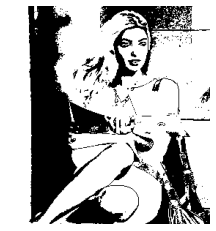

[[45126 23784]
 [ 9309  4327]]
accuracy is:
0.5990962614784484


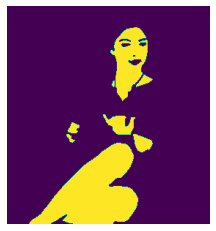

In [215]:
ima = cv2.imread('0520962400.jpg')
g = cv2.imread('0520962400.png')

x,z,_ = np.shape(ima)
size = x*z
# print(np.ravel(ima).reshape(size, -1))
np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)))
u,c = np.unique(gmm.predict(np.ravel(ima).reshape(size, -1)), return_counts = True)
y = u[c == c.max()]
# print(f'for {name}, most freq label is {u[c == c.max()]} with freq {c.max()}')
new_img = [None] * size
predicts = []
predicts = gmm.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicts)):
    if predicts[i] != y:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
nk = [None] * size
for i in range(len(predicts)):
    if predicts[i] == y:
        nk[i] = 255
    else:
        nk[i] = 0
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
print(confusion_matrix(gk, nk))
print('accuracy is:')
print(accuracy_score(gk, nk))
img_ploter(np.array(new_img),x,z)       


## C

In [3]:
gnb = GaussianNB()
gnb.fit(data_X, data_Y)

GaussianNB()

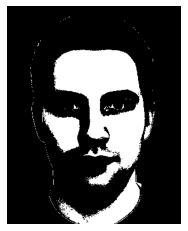

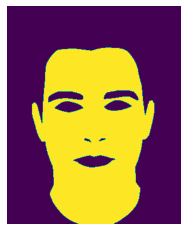

In [216]:
ima = cv2.imread('m(01-32)_gr.jpg')
g = cv2.imread('m(01-32)_gr.png')

x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if predicted_array[i] == 1:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

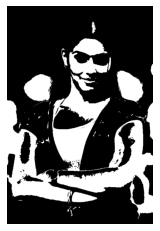

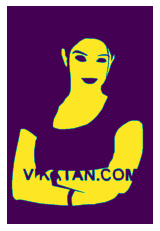

In [217]:
ima = cv2.imread('920480_f520.jpg')
g = cv2.imread('920480_f520.png')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if predicted_array[i] == 1:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

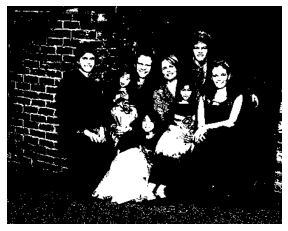

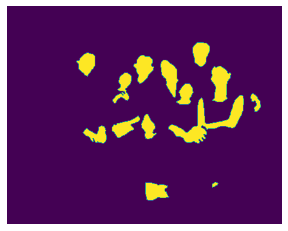

In [218]:
ima = cv2.imread('large_Chapman-family.jpg')
g = cv2.imread('large_Chapman-family.png')

x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if predicted_array[i] == 1:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

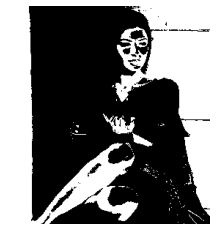

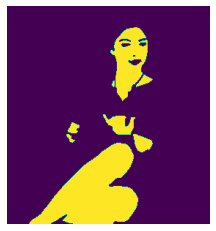

In [219]:
ima = cv2.imread('0520962400.jpg')
g = cv2.imread('0520962400.png')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if predicted_array[i] == 1:
        new_img[i] = [255,255,255]
    else:
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

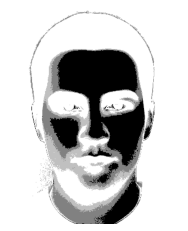

In [220]:
ima = cv2.imread('m(01-32)_gr.jpg')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict_proba(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if .8<= predicted_array[i][1] and predicted_array[i][0]<= 1:
        new_img[i] = [255,255,255]
    elif .6<= predicted_array[i][1] and predicted_array[i][0]<= .8:
        new_img[i] = [192,192,192]
    elif .4<= predicted_array[i][1] and predicted_array[i][0]<= .6:
        new_img[i] = [129,129,129]
    elif .2<= predicted_array[i][1] and predicted_array[i][0]<= .4:
        new_img[i] = [66,66,66]
    else :
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       

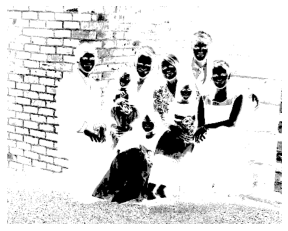

In [8]:
ima = cv2.imread('large_Chapman-family.jpg')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict_proba(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if .8<= predicted_array[i][1] and predicted_array[i][0]<= 1:
        new_img[i] = [255,255,255]
    elif .6<= predicted_array[i][1] and predicted_array[i][0]<= .8:
        new_img[i] = [192,192,192]
    elif .4<= predicted_array[i][1] and predicted_array[i][0]<= .6:
        new_img[i] = [129,129,129]
    elif .2<= predicted_array[i][1] and predicted_array[i][0]<= .4:
        new_img[i] = [66,66,66]
    else :
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       

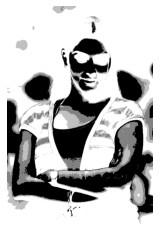

In [9]:
ima = cv2.imread('920480_f520.jpg')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict_proba(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if .8<= predicted_array[i][1] and predicted_array[i][0]<= 1:
        new_img[i] = [255,255,255]
    elif .6<= predicted_array[i][1] and predicted_array[i][0]<= .8:
        new_img[i] = [192,192,192]
    elif .4<= predicted_array[i][1] and predicted_array[i][0]<= .6:
        new_img[i] = [129,129,129]
    elif .2<= predicted_array[i][1] and predicted_array[i][0]<= .4:
        new_img[i] = [66,66,66]
    else :
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       

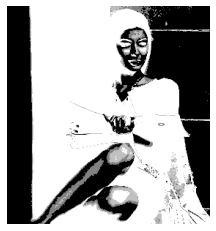

In [10]:
ima = cv2.imread('0520962400.jpg')
x,z,_ = np.shape(ima)
size = x*z
new_img = [None] * size
# print(np.ravel(ima).reshape(size, -1))
predicted_array = gnb.predict_proba(np.ravel(ima).reshape(size, -1))
for i in range(len(predicted_array)):
    if .8<= predicted_array[i][1] and predicted_array[i][0]<= 1:
        new_img[i] = [255,255,255]
    elif .6<= predicted_array[i][1] and predicted_array[i][0]<= .8:
        new_img[i] = [192,192,192]
    elif .4<= predicted_array[i][1] and predicted_array[i][0]<= .6:
        new_img[i] = [129,129,129]
    elif .2<= predicted_array[i][1] and predicted_array[i][0]<= .4:
        new_img[i] = [66,66,66]
    else :
        new_img[i] = [0,0,0]
img_ploter(np.array(new_img),x,z)       

## E

In [18]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [19]:
images = load_images_from_folder('Untitled Folder')
som_of_dim = 0
for i in images :
    som_of_dim += np.shape(i)[0]*np.shape(i)[1]
som_of_dim

705186

In [11]:
gts = []
f_nfv = []
for filename in os.listdir('Untitled Folder'):
    if filename.replace(filename[:-3],'')=='jpg':
        img = cv2.imread(os.path.join('Untitled Folder',filename))
        gt = cv2.imread(os.path.join('Untitled Folder 1',(filename[:-3]+'png')))
        predicted = gnb.predict_proba(img.reshape(-1, 1))
        for i in range(np.shape(img)[0]):
            for j in range(np.shape(img)[1]):
                nfv = np.zeros(12)
                nfv[0] = img[i][j][0]
                nfv[1] = img[i][j][1]
                nfv[2] = img[i][j][2]
                nfv[3] = predicted[i*np.shape(img)[1]+1][1]
                if ((i-1)>=0) and ((j-1)>=0):
                    nfv[4] = predicted[(i-1)*np.shape(img)[1]+(j-1)][1]
                if ((i-1)>=0) and ((j)>=0):
                    nfv[5] = predicted[(i-1)*np.shape(img)[1]+(j)][1]
                if ((i-1)>=0) and ((j+1)<=np.shape(img)[1]):
                    nfv[6] = predicted[(i-1)*np.shape(img)[1]+(j+1)][1]
                if ((i)>=0) and ((j+1)<=np.shape(img)[1]):
                    nfv[7] = predicted[(i)*np.shape(img)[1]+(j+1)][1]
                if ((i+1)<=np.shape(img)[0]) and ((j+1)<=np.shape(img)[1]):
                    nfv[8] = predicted[(i+1)*np.shape(img)[1]+(j+1)][1]
                if ((i+1)<=np.shape(img)[0]) and ((j<np.shape(img)[1])):
                    nfv[9] = predicted[(i+1)*np.shape(img)[1]+(j)][1]
                if ((i+1)<=np.shape(img)[0]) and ((j-1)>=0):
                    nfv[10] = predicted[(i+1)*np.shape(img)[1]+(j-1)][1]
                if ((i)<=np.shape(img)[0]) and ((j-1>=0)):
                    nfv[11] = predicted[(i)*np.shape(img)[1]+(j-1)][1]
                f_nfv+=[nfv]
                gts+=[int(gt[i][j][1])]
#                 print(gts)

In [15]:
gts

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [5]:
df = pd.DataFrame(f_nfv, columns = ['1','2','3','4','5','6','7','8','9','10','11','12'])

## G

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,gts, test_size=0.8, random_state=42)

In [13]:
clf = LogisticRegression(random_state=20)
# clf.fit(X_train, y_train)
clf.fit(X_train, y_train)


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [191]:
f_nfv = []
gt=[]
img = cv2.imread('m(01-32)_gr.jpg')
g = cv2.imread('m(01-32)_gr.png')
predicted = gnb.predict_proba(img.reshape(-1, 1))
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        nfv = np.zeros(12)
        nfv[0] = img[i][j][0]
        nfv[1] = img[i][j][1]
        nfv[2] = img[i][j][2]
        nfv[3] = predicted[i*np.shape(img)[1]+1][1]
        if ((i-1)>=0) and ((j-1)>=0):
            nfv[4] = predicted[(i-1)*np.shape(img)[1]+(j-1)][1]
        if ((i-1)>=0) and ((j)>=0):
            nfv[5] = predicted[(i-1)*np.shape(img)[1]+(j)][1]
        if ((i-1)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[6] = predicted[(i-1)*np.shape(img)[1]+(j+1)][1]
        if ((i)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[7] = predicted[(i)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j+1)<=np.shape(img)[1]):
            nfv[8] = predicted[(i+1)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j<np.shape(img)[1])):
            nfv[9] = predicted[(i+1)*np.shape(img)[1]+(j)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j-1)>=0):
            nfv[10] = predicted[(i+1)*np.shape(img)[1]+(j-1)][1]
        if ((i)<=np.shape(img)[0]) and ((j-1>=0)):
            nfv[11] = predicted[(i)*np.shape(img)[1]+(j-1)][1]
        f_nfv+=[nfv]
        gt+=[int(g[i][j][1])]

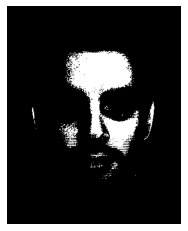

[[77522    51]
 [38060 12367]]


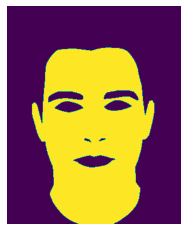

In [193]:
predicts = clf.predict(f_nfv)
a = range(len(predicts))
x,z,_ = np.shape(img)
size = x*z
new_img = [None] * size
for l in a:
    if predicts[l] != 0:
        new_img[l] = [255,255,255]
    else:
        new_img[l] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
print(confusion_matrix(gt, predicts))
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

In [195]:
f_nfv = []
gt=[]
img = cv2.imread('920480_f520.jpg')
g = cv2.imread('920480_f520.png')
predicted = gnb.predict_proba(img.reshape(-1, 1))
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        nfv = np.zeros(12)
        nfv[0] = img[i][j][0]
        nfv[1] = img[i][j][1]
        nfv[2] = img[i][j][2]
        nfv[3] = predicted[i*np.shape(img)[1]+1][1]
        if ((i-1)>=0) and ((j-1)>=0):
            nfv[4] = predicted[(i-1)*np.shape(img)[1]+(j-1)][1]
        if ((i-1)>=0) and ((j)>=0):
            nfv[5] = predicted[(i-1)*np.shape(img)[1]+(j)][1]
        if ((i-1)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[6] = predicted[(i-1)*np.shape(img)[1]+(j+1)][1]
        if ((i)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[7] = predicted[(i)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j+1)<=np.shape(img)[1]):
            nfv[8] = predicted[(i+1)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j<np.shape(img)[1])):
            nfv[9] = predicted[(i+1)*np.shape(img)[1]+(j)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j-1)>=0):
            nfv[10] = predicted[(i+1)*np.shape(img)[1]+(j-1)][1]
        if ((i)<=np.shape(img)[0]) and ((j-1>=0)):
            nfv[11] = predicted[(i)*np.shape(img)[1]+(j-1)][1]
        f_nfv+=[nfv]
        gt+=[int(g[i][j][1])]

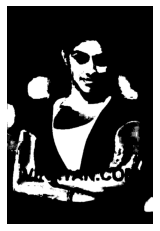

[[269547  28912]
 [ 59736  44805]]


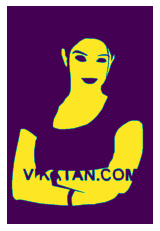

In [196]:
predicts = clf.predict(f_nfv)
a = range(len(predicts))
x,z,_ = np.shape(img)
size = x*z
new_img = [None] * size
for l in a:
    if predicts[l] != 0:
        new_img[l] = [255,255,255]
    else:
        new_img[l] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
print(confusion_matrix(gt, predicts))
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

In [197]:
f_nfv = []
gt=[]
img = cv2.imread('0520962400.jpg')
g = cv2.imread('0520962400.png')
predicted = gnb.predict_proba(img.reshape(-1, 1))
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        nfv = np.zeros(12)
        nfv[0] = img[i][j][0]
        nfv[1] = img[i][j][1]
        nfv[2] = img[i][j][2]
        nfv[3] = predicted[i*np.shape(img)[1]+1][1]
        if ((i-1)>=0) and ((j-1)>=0):
            nfv[4] = predicted[(i-1)*np.shape(img)[1]+(j-1)][1]
        if ((i-1)>=0) and ((j)>=0):
            nfv[5] = predicted[(i-1)*np.shape(img)[1]+(j)][1]
        if ((i-1)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[6] = predicted[(i-1)*np.shape(img)[1]+(j+1)][1]
        if ((i)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[7] = predicted[(i)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j+1)<=np.shape(img)[1]):
            nfv[8] = predicted[(i+1)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j<np.shape(img)[1])):
            nfv[9] = predicted[(i+1)*np.shape(img)[1]+(j)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j-1)>=0):
            nfv[10] = predicted[(i+1)*np.shape(img)[1]+(j-1)][1]
        if ((i)<=np.shape(img)[0]) and ((j-1>=0)):
            nfv[11] = predicted[(i)*np.shape(img)[1]+(j-1)][1]
        f_nfv+=[nfv]
        gt+=[int(g[i][j][1])]

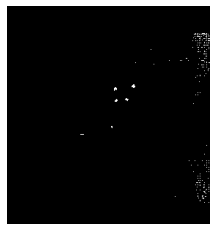

[[68629   281]
 [13634     2]]


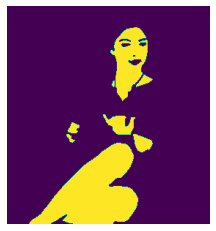

In [198]:
predicts = clf.predict(f_nfv)
a = range(len(predicts))
x,z,_ = np.shape(img)
size = x*z
new_img = [None] * size
for l in a:
    if predicts[l] != 0:
        new_img[l] = [255,255,255]
    else:
        new_img[l] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
print(confusion_matrix(gt, predicts))
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       

In [199]:
f_nfv = []
gt=[]
img = cv2.imread('large_Chapman-family.jpg')
g = cv2.imread('large_Chapman-family.png')
predicted = gnb.predict_proba(img.reshape(-1, 1))
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        nfv = np.zeros(12)
        nfv[0] = img[i][j][0]
        nfv[1] = img[i][j][1]
        nfv[2] = img[i][j][2]
        nfv[3] = predicted[i*np.shape(img)[1]+1][1]
        if ((i-1)>=0) and ((j-1)>=0):
            nfv[4] = predicted[(i-1)*np.shape(img)[1]+(j-1)][1]
        if ((i-1)>=0) and ((j)>=0):
            nfv[5] = predicted[(i-1)*np.shape(img)[1]+(j)][1]
        if ((i-1)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[6] = predicted[(i-1)*np.shape(img)[1]+(j+1)][1]
        if ((i)>=0) and ((j+1)<=np.shape(img)[1]):
            nfv[7] = predicted[(i)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j+1)<=np.shape(img)[1]):
            nfv[8] = predicted[(i+1)*np.shape(img)[1]+(j+1)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j<np.shape(img)[1])):
            nfv[9] = predicted[(i+1)*np.shape(img)[1]+(j)][1]
        if ((i+1)<=np.shape(img)[0]) and ((j-1)>=0):
            nfv[10] = predicted[(i+1)*np.shape(img)[1]+(j-1)][1]
        if ((i)<=np.shape(img)[0]) and ((j-1>=0)):
            nfv[11] = predicted[(i)*np.shape(img)[1]+(j-1)][1]
        f_nfv+=[nfv]
        gt+=[int(g[i][j][1])]

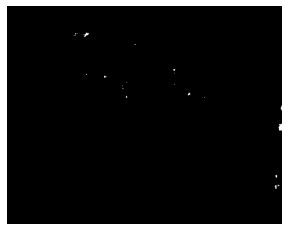

[[150392    136]
 [ 12068     31]]


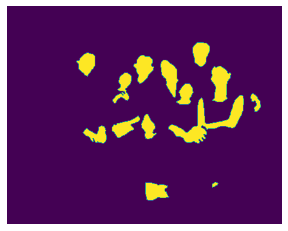

In [200]:
predicts = clf.predict(f_nfv)
a = range(len(predicts))
x,z,_ = np.shape(img)
size = x*z
new_img = [None] * size
for l in a:
    if predicts[l] != 0:
        new_img[l] = [255,255,255]
    else:
        new_img[l] = [0,0,0]
img_ploter(np.array(new_img),x,z)       
print(confusion_matrix(gt, predicts))
gk =[]
for i in range(np.shape(g)[0]):
    for j in range(np.shape(g)[1]):
        gk+=[int(g[i][j][1])]
img_ploter(np.array(new_img),x,z)       